# Практична робота №7
### Студентки групи МІТ-31 (підгрупа 1)
### Борук Дарини Ігорівни

##### For binary classification

In [147]:
import pandas as pd
import numpy as np

#Function to generate synthetic data with two features
def generate_binary_classification_data(num_samples, features_range, grades_range, random_seed):
    np.random.seed(random_seed)

    #Generate random features within the specified range for each feature
    feature_1 = np.round(np.random.uniform(low=features_range[0], high=features_range[1], size=(num_samples,)))
    feature_2 = np.round(np.random.uniform(low=features_range[0], high=features_range[1], size=(num_samples,)))

    #Assign class labels based on a positive range condition
    labels = np.where((feature_1 >= grades_range[0]) & (feature_1 <= grades_range[1]) &
                      (feature_2 >= grades_range[0]) & (feature_2 <= grades_range[1]), 1, 0)

    #Create a DataFrame
    df = pd.DataFrame({'Labs': feature_1, 'Practices': feature_2, 'Target': labels})

    return df

binary_data = generate_binary_classification_data(num_samples=200, features_range=(1, 100), grades_range=(60, 100), random_seed=13)

binary_data.to_csv('binary_classification.csv', index=False)

In [148]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = binary_data.drop('Target', axis=1)
y = binary_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

#Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

binary_model = Sequential([
  Dense(10, activation='relu', input_shape=(X.shape[1],)),
  Dense(10, activation='relu'),
  Dense(1, activation='sigmoid')
])

binary_model.compile(loss="binary_crossentropy",
                optimizer='adam',
                metrics=['accuracy'])

binary_history = binary_model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

binary_test_loss, binary_test_accuracy = binary_model.evaluate(X_test_scaled, y_test)
print(f"Model loss on the test set: {binary_test_loss}")
print(f"Model accuracy on the test set: {100*binary_test_accuracy:.2f}%")

Epoch 1/50
5/5 [==============================] - 1s 33ms/step - loss: 0.8420 - accuracy: 0.1250 - val_loss: 0.7970 - val_accuracy: 0.2500
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 0.8168 - accuracy: 0.1312 - val_loss: 0.7784 - val_accuracy: 0.2500
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.7936 - accuracy: 0.1375 - val_loss: 0.7613 - val_accuracy: 0.2750
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 0.7734 - accuracy: 0.1437 - val_loss: 0.7463 - val_accuracy: 0.3000
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 0.7546 - accuracy: 0.1937 - val_loss: 0.7326 - val_accuracy: 0.3750
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.7381 - accuracy: 0.2875 - val_loss: 0.7199 - val_accuracy: 0.4250
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.7225 - accuracy: 0.4187 - val_loss: 0.7082 - val_accuracy: 0.4500
Epoch 8/50
5/5 [=================

In [149]:
from tensorflow.keras.callbacks import LearningRateScheduler
import math

improved_binary_model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
improved_binary_model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]) 

#Create a learning rate scheduler callback
def lr_schedule(epoch):
    initial_lr = 0.001
    decay_factor = 0.9
    decay_step = 10
    lr = initial_lr * math.pow(decay_factor, math.floor((1 + epoch) / decay_step))
    return lr

lr_improved_binary_scheduler = LearningRateScheduler(lr_schedule)

#Fit the model (passing the lr_scheduler callback)
improved_binary_history = improved_binary_model.fit(X_train_scaled, 
                      y_train, 
                      epochs=300,
                      validation_data=(X_test_scaled, y_test),
                      callbacks=[lr_improved_binary_scheduler])

improved_binary_loss, improved_binary_accuracy = improved_binary_model.evaluate(X_test_scaled, y_test)
print(f"\nModel loss on the test set: {improved_binary_loss}")
print(f"Model accuracy on the test set: {100*improved_binary_accuracy:.2f}%")

binary_model_accuracy = binary_history.history['accuracy'][-1]  #Or 'val_accuracy' for validation accuracy
improved_binary_model_accuracy = improved_binary_history.history['accuracy'][-1]

binary_model_results = [["binary_model", binary_model_accuracy],
                 ["improved_binary_model", improved_binary_model_accuracy]]
all_results = pd.DataFrame(binary_model_results, columns=["model", "accuracy"])
print("\nn", all_results)

Epoch 1/300
5/5 [==============================] - 1s 31ms/step - loss: 0.5933 - accuracy: 0.8750 - val_loss: 0.5803 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/300
5/5 [==============================] - 0s 8ms/step - loss: 0.5304 - accuracy: 0.8750 - val_loss: 0.5247 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 3/300
5/5 [==============================] - 0s 9ms/step - loss: 0.4620 - accuracy: 0.8750 - val_loss: 0.4684 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/300
5/5 [==============================] - 0s 8ms/step - loss: 0.3933 - accuracy: 0.8750 - val_loss: 0.4205 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/300
5/5 [==============================] - 0s 8ms/step - loss: 0.3316 - accuracy: 0.8750 - val_loss: 0.3892 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/300
5/5 [==============================] - 0s 10ms/step - loss: 0.2843 - accuracy: 0.8750 - val_loss: 0.3622 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/300
5/5 [==============================] - 0s 8ms/step - loss: 0.2466 - accura

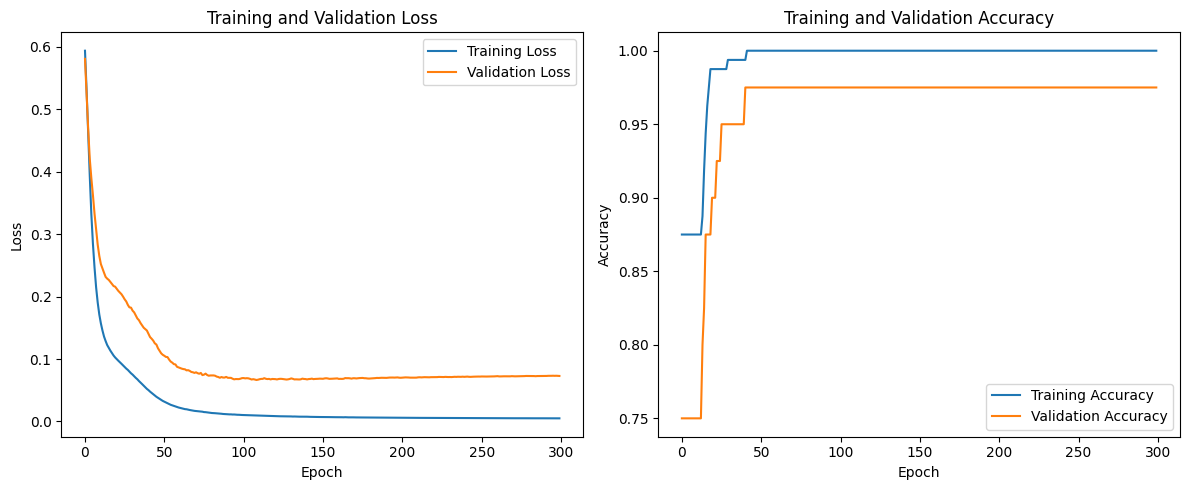

In [150]:
import matplotlib.pyplot as plt

# Extract training and validation loss
train_loss = improved_binary_history.history['loss']
val_loss = improved_binary_history.history['val_loss']

# Extract training and validation accuracy
train_accuracy = improved_binary_history.history['accuracy']
val_accuracy = improved_binary_history.history['val_accuracy']

# Plotting the Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

##### For multiclass classification

In [151]:
import pandas as pd
import numpy as np

#Define a function to generate synthetic data with two features
def generate_classification_data(num_samples, features_range, random_seed):
    np.random.seed(random_seed)

    #Generate random features within the specified range for each feature
    feature_1 = np.round(np.random.uniform(low=features_range[0], high=features_range[1], size=(num_samples,)), 1)
    feature_2 = np.round(np.random.uniform(low=features_range[0], high=features_range[1], size=(num_samples,)), 1)

    #Define conditions and corresponding values
    conditions = [
        (feature_1 < 36) | (feature_2 < 36),
        (feature_1 >= 36) & (feature_1 < 60) & (feature_2 >= 36) & (feature_2 < 60),
        (feature_1 >= 60) & (feature_2 >= 60)
    ]
    values = ['Low', 'Medium', 'High']

    #Assign class labels based on conditions
    labels = np.select(conditions, values, default='Low')

    #Create a DataFrame
    df = pd.DataFrame({'Feature1': feature_1, 'Feature2': feature_2, 'Target': labels})

    return df


multiclass_data = generate_classification_data(num_samples=1000, features_range=(1, 100), random_seed=13)

multiclass_data.to_csv('multiclass_classification.csv', index=False)

In [152]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = data.drop('Target', axis=1)
y = data['Target']

#Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=33)

#Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

multiclass_model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')  #3 output neurons for 'Low', 'Medium', 'High'
])

multiclass_model.compile(loss='sparse_categorical_crossentropy',  #Different loss function for multiclass classifcation
                 optimizer='adam',
                 metrics=["accuracy"])

multiclass_history = multiclass_model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

#Evaluate the model on the test set
multiclass_test_loss, multiclass_test_acc = multiclass_model.evaluate(X_test_scaled, y_test)
print(f"Model loss on the test set: {multiclass_test_loss}")
print(f"Model accuracy on the test set: {100*multiclass_test_acc:.2f}%")

Epoch 1/50
25/25 [==============================] - 1s 8ms/step - loss: 1.1398 - accuracy: 0.3200 - val_loss: 1.0614 - val_accuracy: 0.4600
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.9978 - accuracy: 0.6475 - val_loss: 0.9398 - val_accuracy: 0.8750
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.8795 - accuracy: 0.9325 - val_loss: 0.8280 - val_accuracy: 0.9500
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.7632 - accuracy: 0.9350 - val_loss: 0.7141 - val_accuracy: 0.9300
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6533 - accuracy: 0.9275 - val_loss: 0.6128 - val_accuracy: 0.9250
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5575 - accuracy: 0.9287 - val_loss: 0.5255 - val_accuracy: 0.9200
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.9275 - val_loss: 0.4510 - val_accuracy: 0.9300
Epoch 8/50
25/25 [==

In [153]:
improved_multiclass_model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

improved_multiclass_model.compile(loss='sparse_categorical_crossentropy',  #Different loss function for multiclass classifcation
                 optimizer='adam',
                 metrics=["accuracy"])

#Create a learning rate scheduler callback
from tensorflow.keras.callbacks import LearningRateScheduler
import math

def lr_schedule(epoch):
    initial_lr = 0.001
    decay_factor = 0.9
    decay_step = 10
    lr = initial_lr * math.pow(decay_factor, math.floor((1 + epoch) / decay_step))
    return lr

lr_multiclass_scheduler = LearningRateScheduler(lr_schedule)

#Fit the model (passing the lr_scheduler callback)
improved_multiclass_history = improved_multiclass_model.fit(X_train_scaled, y_train, epochs=300, validation_data=(X_test_scaled, y_test), callbacks=[lr_multiclass_scheduler])

multiclass_model_accuracy = multiclass_history.history['accuracy'][-1]  #Or 'val_accuracy' for validation accuracy
improved_multiclass_model_accuracy = improved_multiclass_history.history['accuracy'][-1]

multiclass_model_results = [["multiclass_model", multiclass_model_accuracy],
                 ["improved_multiclass_model", improved_multiclass_model_accuracy]]
all_results = pd.DataFrame(multiclass_model_results, columns=["model", "accuracy"])
print("\nn", all_results)

Epoch 1/300
25/25 [==============================] - 1s 7ms/step - loss: 0.9946 - accuracy: 0.6300 - val_loss: 0.8147 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 2/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.9225 - val_loss: 0.4684 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 3/300
25/25 [==============================] - 0s 4ms/step - loss: 0.3486 - accuracy: 0.9438 - val_loss: 0.2581 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 4/300
25/25 [==============================] - 0s 3ms/step - loss: 0.2205 - accuracy: 0.9500 - val_loss: 0.2064 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 5/300
25/25 [==============================] - 0s 2ms/step - loss: 0.1839 - accuracy: 0.9563 - val_loss: 0.1858 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9500 - val_loss: 0.1752 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 0.1

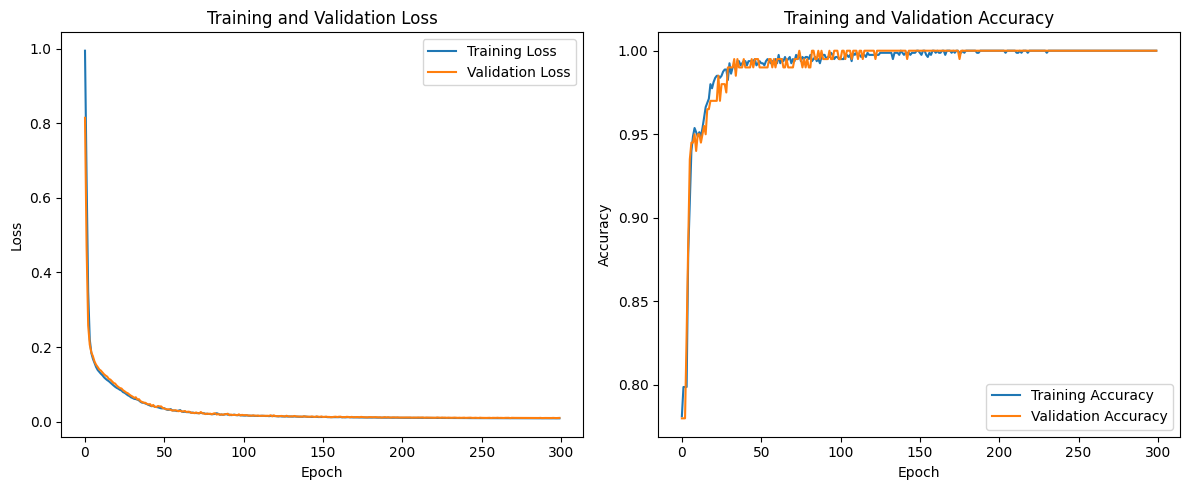

In [154]:
import matplotlib.pyplot as plt

# Extract training and validation loss
train_loss = improved_multiclass_history.history['loss']
val_loss = improved_multiclass_history.history['val_loss']

# Extract training and validation accuracy
train_accuracy = improved_history.history['accuracy']
val_accuracy = improved_history.history['val_accuracy']

# Plotting the Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()